# Oldschool Runescape experience lamps to max

In Oldschool Runescape (OSRS), there's a chance for a [genie](https://oldschool.runescape.wiki/w/Genie) to appear next to you and offer you a lamp giving a small amount of experience points in any of the twenty-three skills. The experience received is given by ten times the current level of the given skill. For example, if the player is level 15 magic, the lamp would give 150 magic experience points.

## tl;dr

For most skills, it would take 15,057 experience lamps to go from 0 experience to level 99. The hitpoints stat begins at level 10 on account creation, so it would take a slightly smaller number of 15,026 lamps to achieve 99 hitpoints. To fully max an account from the beginning using only lamps, it would take 346,280 lamps.

## Experience points to level

According to [the wiki](https://oldschool.runescape.wiki/w/Experience) for the game, the number of experience points $E$ to achieve a given level $L$ is

$$ E = \left \lfloor \frac{1}{4} \sum_{l=1}^{L-1} \left \lfloor l + 300 \times 2^{\frac{l}{7}} \right \rfloor \right \rfloor \text{.} $$

As can be seen from the $2^\frac{l}{7}$ term, the experience required to get to each level increases exponentially (roughly doubling every seven levels). As such, it's common knowledge in the game that level 92 is roughly halfway to the maximum level of 99.

## Experience lamps

But one must ask *how many lamps would it take to go from 0 experience points to max?* This can be easily calculated with a simple script:

In [1]:
import numpy as np

# Set up arrays; initialise exp array with zeros
max_level = 99
levels = np.arange(max_level)+1
E = np.zeros(len(levels))
current_xp = 0
current_lvl = 1
num_lamps = np.zeros(len(levels)) # initialise with zero lamps
lamps_ind = 0

for L in levels:
    E[L-1] = np.floor(0.25*sum(np.floor(levels[:L-1] + 300*2**(levels[:L-1]/7))))
    
while current_lvl < max_level:
    # Use a lamp
    current_xp = current_xp + 10*current_lvl
    num_lamps[current_lvl-1] = num_lamps[current_lvl-1] + 1
    
    # Update current level
    current_lvl = sum(current_xp > E)
    
# Print some info
print('\nIt would take '+str(int(sum(num_lamps)))+' lamps to get from level '+str(levels[0])+' to level '+str(max_level)+'.\n')
#for ii in range(len(num_lamps)-1):
#    print('It would take '+str(int(num_lamps[ii]))+' lamps to get from level '+str(levels[ii])+' to level '+str(levels[ii]+1)+'.')


It would take 15057 lamps to get from level 1 to level 99.



Thus, it would take 15057 lamps to get from 0 experience to level 99 in a single skill. However, one skill is a little different. Each account starts with their hitpoints skill at level 10, with 1154 experience points. We can run a very similar script to above to calculate the number of lamps to get 99 hitpoints:

In [2]:
# Reset the current exp:
current_xp_hp = 1154
current_lvl_hp = 10
num_lamps_hp = np.zeros(len(levels))

while current_lvl_hp < max_level:
    # Use a lamp
    current_xp_hp = current_xp_hp + 10*current_lvl_hp
    num_lamps_hp[current_lvl_hp-1] = num_lamps_hp[current_lvl_hp-1] + 1
    
    # Update current level
    current_lvl_hp = sum(current_xp_hp > E)
    
# Print output
print('\nIt would take '+str(int(sum(num_lamps_hp)))+' lamps to get from 10 hitpoints to '+str(max_level)+' hitpoints.\n')


It would take 15026 lamps to get from 10 hitpoints to 99 hitpoints.



So it would take slightly fewer lamps to achieve 99 hitpoints, but still within a small margin.

## Playtime for a maxed skill

Sadly, the genie random event is not particularly frequent, meaning lamps don't come by often. Based on my own experience, I'd estimate a player can obtain one lamp roughly every ten or so hours in game. Thus, to achieve a 99 using only lamps, the time played would be somewhere in the order of hundreds of thousands of hours, corresponding to potentially decades of playing 24/7 to max a single skill using only lamps. That's some pretty hardcore dedication.

## Maxing an account

As mentioned above, there are twenty-three trainable skills in OSRS at the time of writing. One of the skills is hitpoints, taking 15026 lamps. The other twenty-two take 15057 lamps each. We can calculate the total number of lamps needed to fully max an account:

$$N_{lamps} = 22\times 15057 + 15026 = 346280 \text{ lamps.} $$

Almost 350,000 lamps. That's quite a lot, especially considering the low frequency of obtaining a lamp. Using the above estimation of ten hours per lamp, this yields the total time to max an account using only lamps somewhere in the range of millions of hours. This corresponds to somewhere in the range of hundreds of years, so it's likely impossible for a single human to max an account using only lamps.

## Further analysis

We can look a little further into level progression using lamps. Because we calculated the number of lamps for each level, we can create a plot showing how many lamps it will take to achieve the next level.

Text(0, 0.5, 'Cumulative number of lamps to reach a given level')

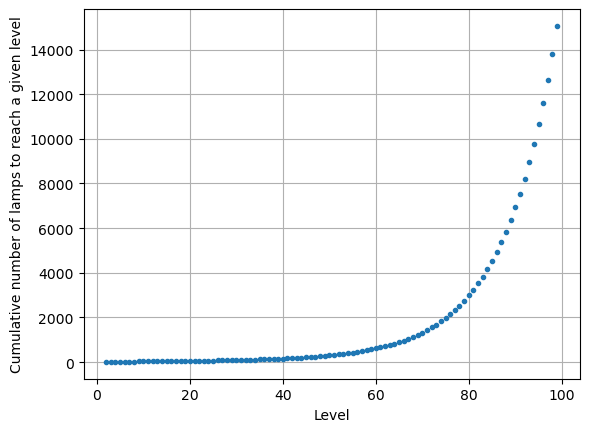

In [3]:
import matplotlib.pyplot as plt

# Create a plot showing the cumulative number of lamps to get to a given level
plt.plot(levels[1:],np.cumsum(num_lamps[:-1]),'.')
plt.grid()
plt.xlabel('Level')
plt.ylabel('Cumulative number of lamps to reach a given level')

Unsurprisingly, this appears to roughly follow an exponential trend. We can probe further using a logarithmic $y$ axis.

Text(0, 0.5, 'Cumulative number of lamps to reach a given level')

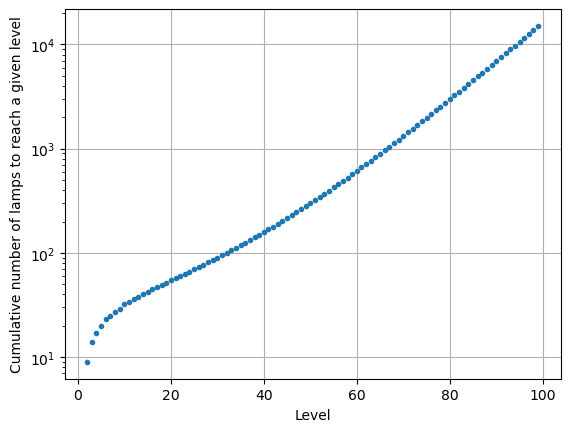

In [4]:
plt.semilogy(levels[1:],np.cumsum(num_lamps[:-1]),'.')
plt.grid()
plt.xlabel('Level')
plt.ylabel('Cumulative number of lamps to reach a given level')

As expected, this is roughly a straight line, though the early levels are a little curvy. This is likely due to the relatively large *percentage of a level* each lamp gives. For example, at level 1, a lamp gives 10exp, which is ~12\% of the way to level 2. However, at level 98, each lamp only gives ~0.08\% of the way to 99. Thus, the level increase rate at higher levels will follow a more expected pattern.

## Number of lamps to get to the next level

What may be of interest is how many lamps it'll take to get from one level-up to the next. We can also plot this easily since we calculated it in our for loop.

Text(0, 0.5, 'Number of lamps between consecutive levels')

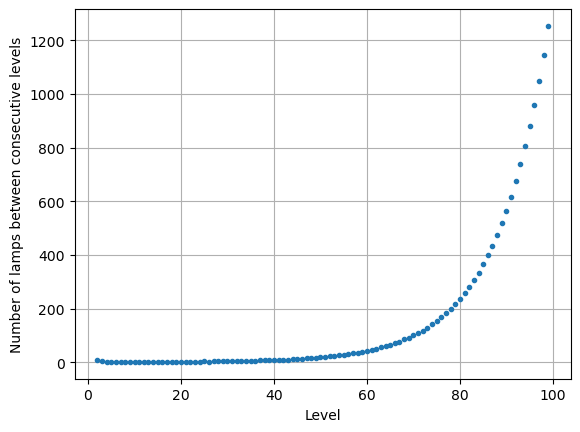

In [5]:
plt.plot(levels[1:],num_lamps[:-1],'.')
plt.grid()
plt.xlabel('Level')
plt.ylabel('Number of lamps between consecutive levels')

As expected, this also looks roughly exponential. However, what's interesting is right at the start. Let's zoom in a bit:

Text(0, 0.5, 'Number of lamps between consecutive levels')

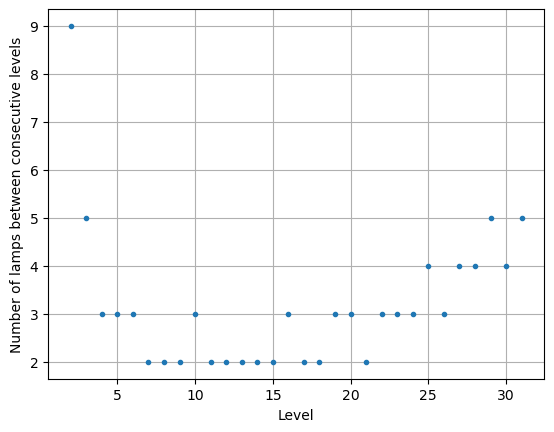

In [6]:
max_level_zoomed = 30
plt.plot(levels[1:max_level_zoomed+1],num_lamps[:max_level_zoomed],'.')
plt.grid()
plt.xlabel('Level')
plt.ylabel('Number of lamps between consecutive levels')

What's interesting here is that there's a dip between levels 10 and 20. This is because at early levels, the experience per lamp is relatively small due to the low level. On the other end, at higher levels, a large amount of experience is needed for each level-up, requiring many lamps. However, somewhere between, these balance, wherein the experence for each level-up is still relatively low, but the experience per lamp has increased. This seems to be between levels 10 and 20, requiring as little as two lamps for each level-up.

## Conclusion

This little investigation had some expected results and some unexpected ones. Personally, I expected far more than 15,000 lamps to max a level, but the exponential trend of the lamps was unsurprising. I found the local minimum/dip in number of lamps for consecutive levels quite surprising; I expected this value to be strictly monotonically increasing as the player levelled up.